<h2> Mean Shift Clustering </h2>

<h4>1. Introduction</h4>

Mean Shift Clustering automatically discovers the number of clusters (K).

In the beginning, all points are centers of clusters. Each cluster has a Radius (bandwidth).

For each cluster, the algorithm moves the cluster center to the center of the mass point. The process ends when the cluster center does not move anymore. It is expected that several close points converge to the same cluster.

Can have levels of the radius with penalties to high values.

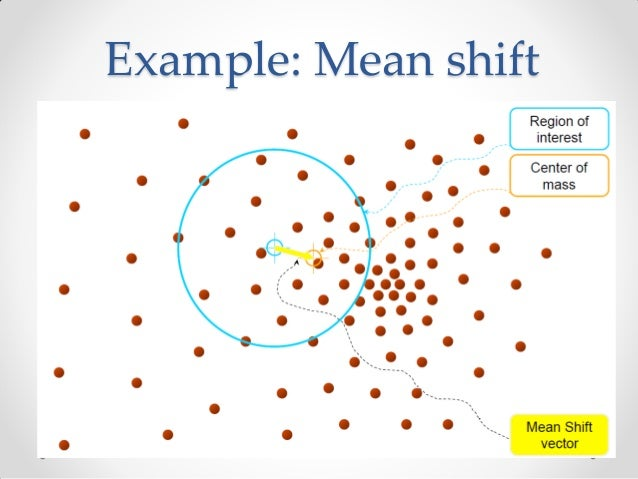

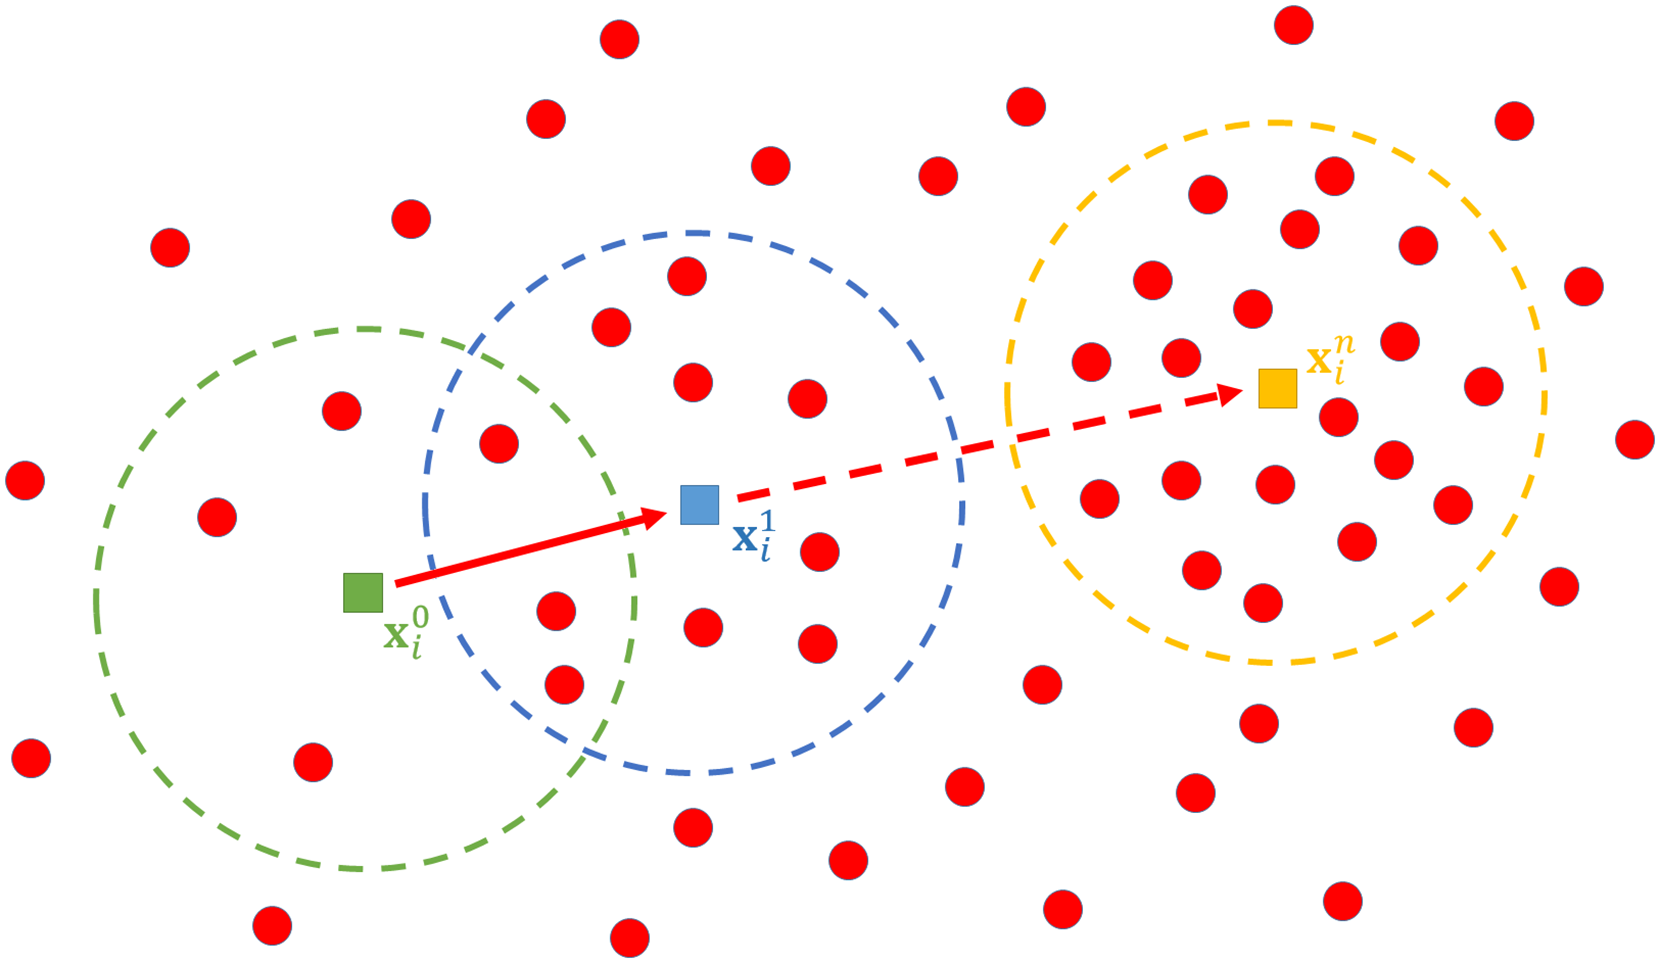

<h4>2. Formal Explanation</h4>

Mean shift is a procedure for locating the maxima—the modes—of a density function given discrete data sampled from that function. This is an iterative method, and we start with an initial estimate ${\displaystyle x}$. Let a kernel function ${\displaystyle K(x_{i}-x)}$  be given. This function determines the weight of nearby points for re-estimation of the mean. Typically a Gaussian kernel on the distance to the current estimate is used, ${\displaystyle K(x_{i}-x)=e^{-c||x_{i}-x||^{2}}} $. The weighted mean of the density in the window determined by {\displaystyle K}K is

$${\displaystyle m(x)={\frac {\sum _{x_{i}\in N(x)}K(x_{i}-x)x_{i}}{\sum _{x_{i}\in N(x)}K(x_{i}-x)}}}$$

where ${\displaystyle N(x)}$  is the neighborhood of ${\displaystyle x}$, a set of points for which ${\displaystyle K(x_{i}-x)\neq 0}$.

The difference ${\displaystyle m(x)-x}$ is called mean shift in Fukunaga and Hostetler. The mean-shift algorithm now sets ${\displaystyle x\leftarrow m(x)}$ , and repeats the estimation until ${\displaystyle m(x)}$  converges.

Although the mean shift algorithm has been widely used in many applications, a rigid proof for the convergence of the algorithm using a general kernel in a high dimensional space is still not known. Aliyari Ghassabeh showed the convergence of the mean shift algorithm in one-dimension with a differentiable, convex, and strictly decreasing profile function. However, the one-dimensional case has limited real world applications. Also, the convergence of the algorithm in higher dimensions with a finite number of the stationary (or isolated) points has been proved. However, sufficient conditions for a general kernel function to have finite stationary (or isolated) points have not been provided.

Gaussian Mean-Shift is an Expectation–maximization algorithm.

<h2>Titanic Data</h2>

Data set columns
* pclass - passanger class (1,2,3)
* survived - survival: 0=no; 1=yes
* name
* sex
* age
* sibsp - Number of siblings/Spouses abourd
* parch - Number of parents/Children aboard
* ticket - ticket number
* fare - Passanger fare (Britsh pound)
* cabin - Cabin
* embarked - Port of embarkation (C-Chersburg; Q-Queenstown; S-Southanpton)
* boat - Lifboat
* body - body identification number
* home.dest - Home/destination

The model uses the columns (except survived and boat) to separate the data into two groups. Those groups 'coincides' with ~69% with the Survived/not Survived groups 

In [6]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

style.use('ggplot')

In [7]:
#convert all data to numeric
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_values = {}
        def convert_to_int(val):
            return text_digit_values[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_values:
                    text_digit_values[unique] = x
                    x+=1
                    
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

In [16]:
df = pd.read_excel('titanic.xls')
original_df = pd.DataFrame.copy(df)

#remove not interesting colunms 
df.drop(['name','body'], 1, inplace=True)

#Fill NaN with zero
df.fillna(0, inplace=True)

#data treatment, transforming all into numerical type
df = handle_non_numeric_data(df)

#set numbers in table into numeric type
#df.convert_objects(convert_numeric=True)
for column in df.columns.values:
    pd.to_numeric(df[column])
    
df.drop(['boat'], 1, inplace=True)

#all data except survived column
X = np.array(df.drop(['survived'],1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)


labels = clf.labels_
cluster_centers = clf.cluster_centers_
original_df['cluster_group'] = np.nan


correct = 0
for i in range(len(X)):
    #iloc gives the row (index)
    original_df['cluster_group'].iloc[i] = labels[i]
    
n_clusters_ = len(np.unique(labels))

survival_rates = {}
for i in range(n_clusters_):    
    temp_df = original_df[(original_df['cluster_group']==float(i))]
    survival_cluster = temp_df[ (temp_df['survived']==1)]
    survival_rate = len(survival_cluster)/len(temp_df)
    survival_rates[i] = survival_rate    
    
print('accuracy:', survival_rates)

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


accuracy: {0: 0.3814516129032258, 1: 0.08333333333333333, 2: 1.0, 3: 0.1, 4: 0.6206896551724138}


In [21]:
#it appers the groups are mainly formed based in fare
print(original_df[(original_df['cluster_group']==0)].describe())

            pclass     survived         age        sibsp        parch  \
count  1240.000000  1240.000000  987.000000  1240.000000  1240.000000   
mean      2.312097     0.381452   29.811719     0.383065     0.278226   
std       0.824474     0.485939   14.147091     0.709127     0.624372   
min       1.000000     0.000000    0.166700     0.000000     0.000000   
25%       2.000000     0.000000   21.000000     0.000000     0.000000   
50%       3.000000     0.000000   28.000000     0.000000     0.000000   
75%       3.000000     1.000000   38.000000     1.000000     0.000000   
max       3.000000     1.000000   80.000000     4.000000     4.000000   

              fare        body  cluster_group  
count  1239.000000  114.000000         1240.0  
mean     26.670463  161.798246            0.0  
std      33.035014   98.697283            0.0  
min       0.000000    1.000000            0.0  
25%       7.895800   70.500000            0.0  
50%      13.000000  165.500000            0.0  
75%   

In [22]:
cluster_0 = original_df[(original_df['cluster_group']==0)]
#first class of cluster_0
cluster_0_fc = cluster_0[ (cluster_0['pclass'] == 1)]
cluster_0_fc.describe()

,pclass,survived,age,sibsp,parch,fare,body,cluster_group
count,288.0,288.000000,249.000000,288.000000,288.000000,288.000000,31.000000,288.0
mean,1.0,0.611111,39.142236,0.378472,0.232639,67.277546,168.451613,0.0
std,0.0,0.488347,14.428362,0.520475,0.519358,46.506134,86.191971,0.0
min,1.0,0.000000,0.916700,0.000000,0.000000,0.000000,16.000000,0.0
25%,1.0,0.000000,28.500000,0.000000,0.000000,30.000000,109.500000,0.0
50%,1.0,1.000000,39.000000,0.000000,0.000000,55.441700,172.000000,0.0
75%,1.0,1.000000,49.000000,1.000000,0.000000,83.158300,239.500000,0.0
max,1.0,1.000000,80.000000,2.000000,2.000000,247.520800,307.000000,0.0
